In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\Ananya Sinha\VS code docs\MLpython\PROJECTS\MLproject\notebook\data\Studentperf.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Gender categories:    ",end=" ")
print(df['gender'].unique())

print("Race/ethnicity categories:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Parental level of education categories:  ",end=" ")
print(df['parental level of education'].unique())

print("lunch variables:  ",end=" ")
print(df['lunch'].unique())

print("Test prep course categories:  ",end=" ")
print(df['test preparation course'].unique())


Gender categories:     ['female' 'male']
Race/ethnicity categories:   ['group B' 'group C' 'group A' 'group D' 'group E']
Parental level of education categories:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch variables:   ['standard' 'free/reduced']
Test prep course categories:   ['none' 'completed']


In [12]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('{} numerical features:{}'.format(len(numeric_features),numeric_features))
print('{}  categorical features:{}'.format(len(categorical_features),categorical_features))

3 numerical features:['math score', 'reading score', 'writing score']
5  categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f'Students with full marks in Maths:{math_full}')
print(f'Students with full marks in Reading:{reading_full}')
print(f'Students with full marks in Writing:{writing_full}')

Students with full marks in Maths:7
Students with full marks in Reading:17
Students with full marks in Writing:14


In [16]:
reading_lessthan20=df[df['reading score']<=20]['average'].count()
writing_lessthan20=df[df['writing score']<=20]['average'].count()
maths_lessthan20=df[df['math score']<=20]['average'].count()

print(f'Students with less than 20 marks in Maths: {maths_lessthan20}')
print(f'Students with less than 20 marks in Reading: {reading_lessthan20}')
print(f'Students with less than 20 marks in Writing: {writing_lessthan20}')

Students with less than 20 marks in Maths: 4
Students with less than 20 marks in Reading: 1
Students with less than 20 marks in Writing: 3


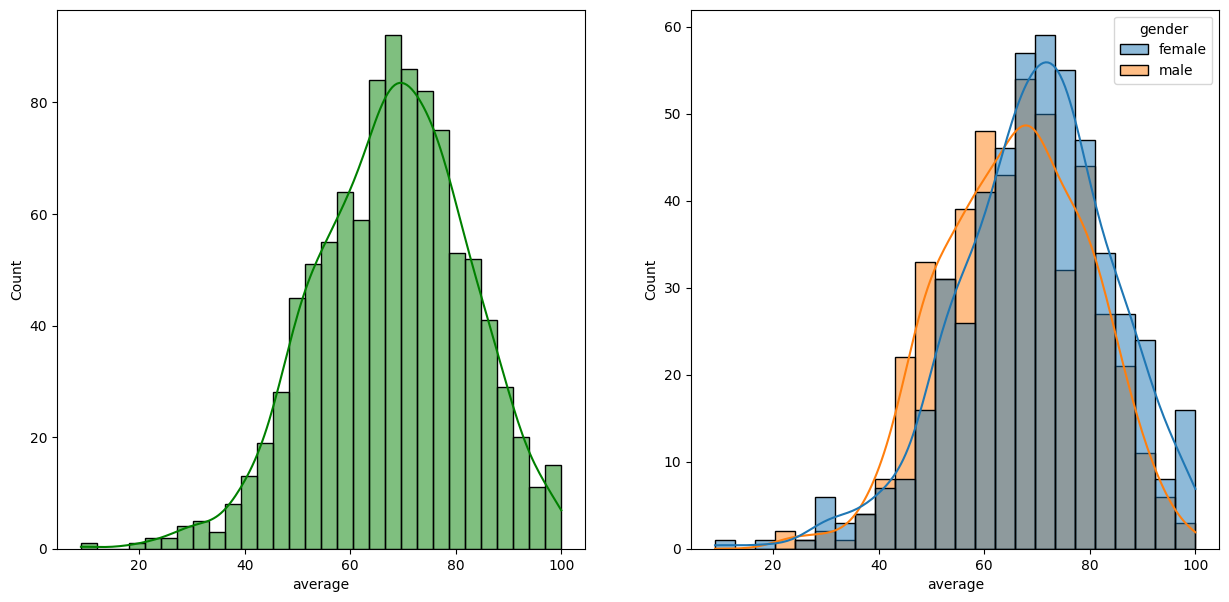

In [17]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

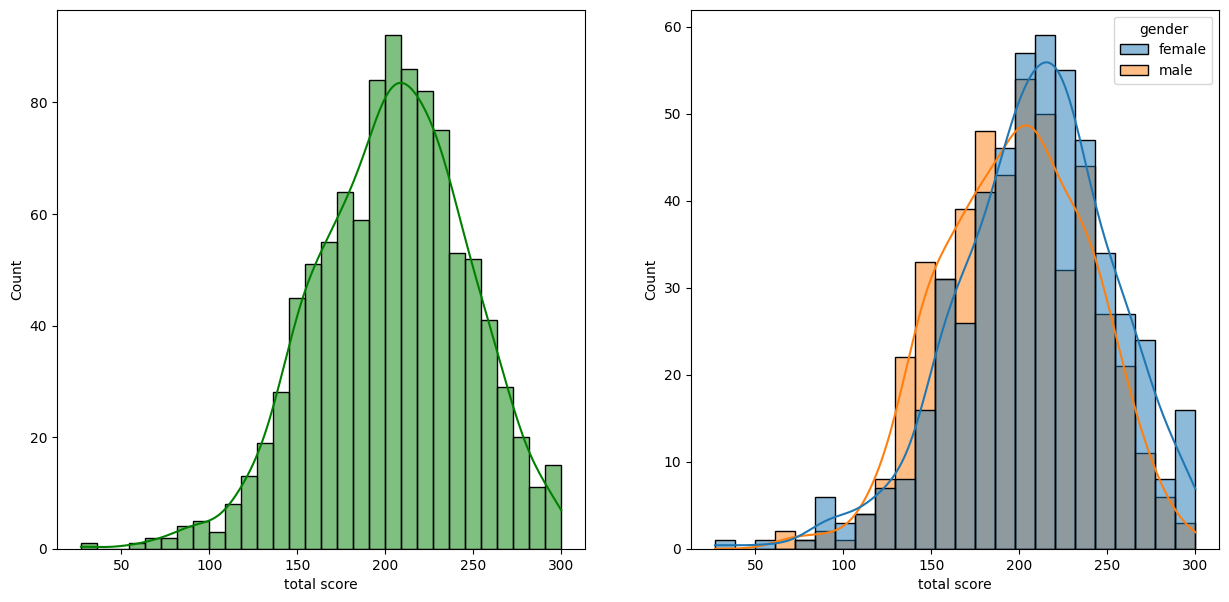

In [18]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

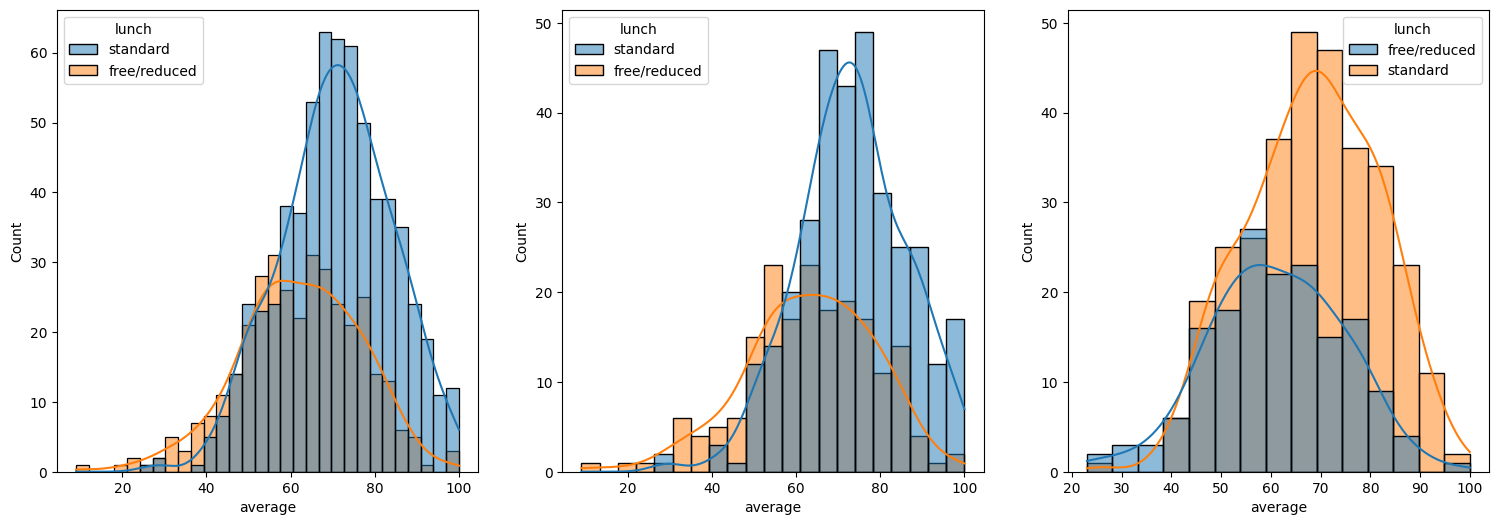

In [20]:
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

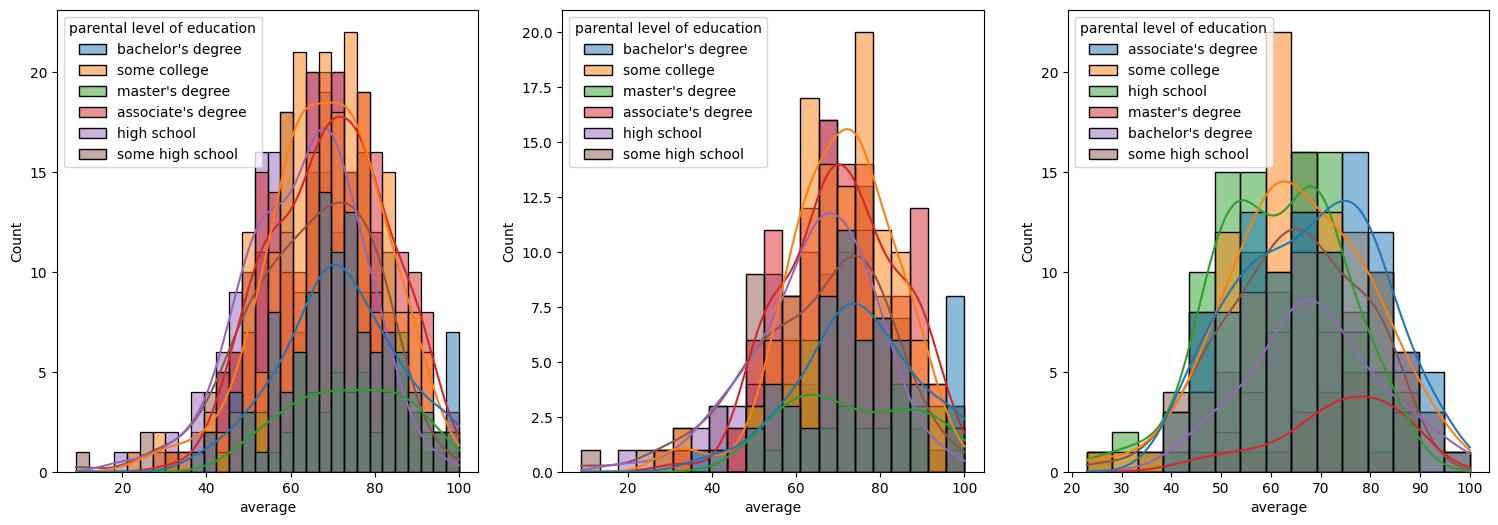

In [21]:
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

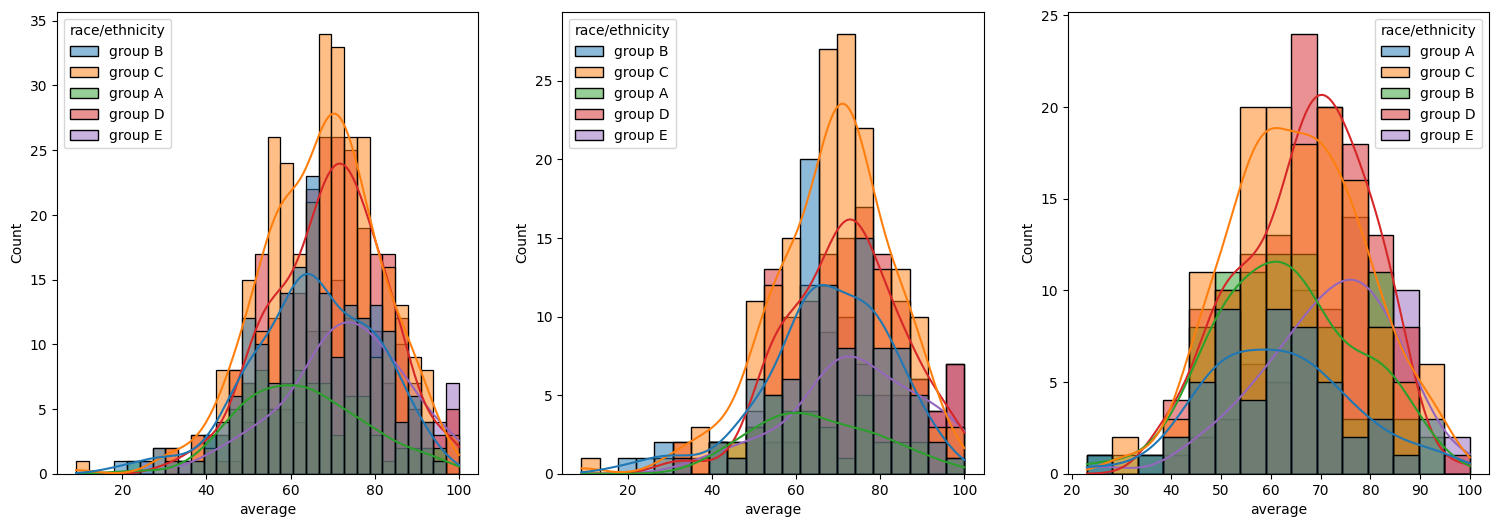

In [22]:
fig, axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

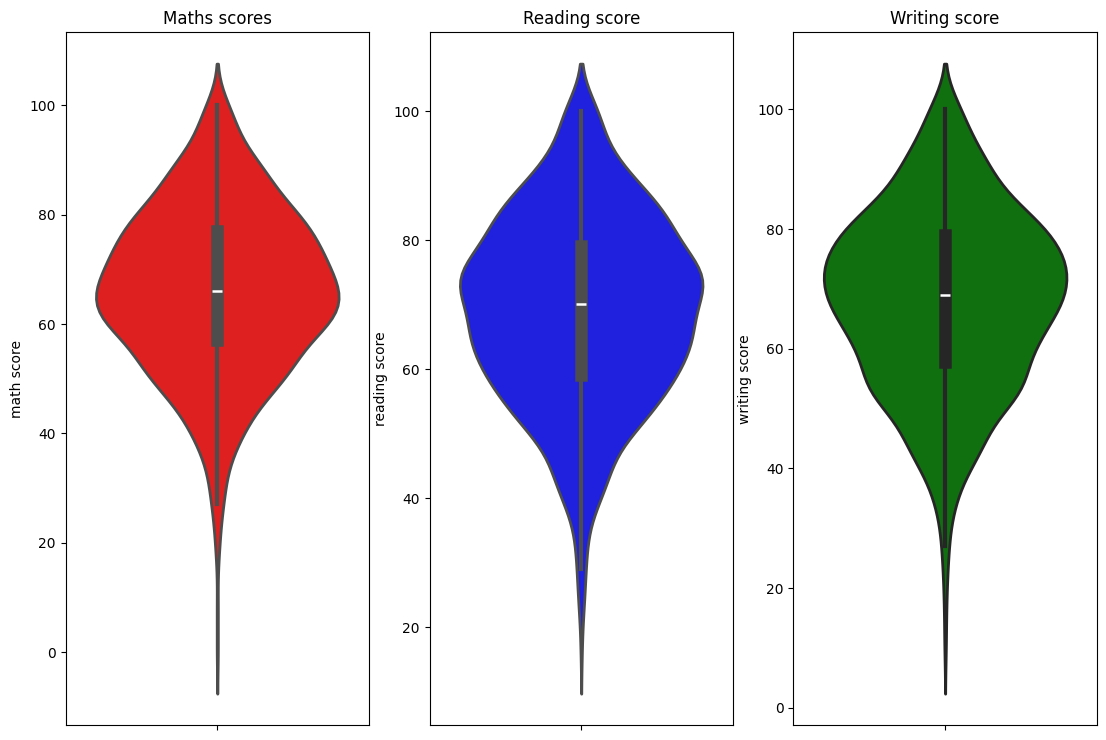

In [25]:
plt.figure(figsize=(18,9))
plt.subplot(1,4,1)
plt.title('Maths scores')
sns.violinplot(y='math score',data=df,color='red',linewidth=2)
plt.subplot(1,4,2)
plt.title('Reading score')
sns.violinplot(y='reading score',data=df,color='blue',linewidth=2)
plt.subplot(1,4,3)
plt.title('Writing score')
sns.violinplot(y='writing score',data=df,color='green',linewidth=2)
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(30,12)
